This is the final version of my notebook. Forked from my earlier version where I achieved a lower score.

# Problem Statement

#### The objective of this classification task is to predict customer churn for a financial institution. Specifically, the goal is to determine whether a customer will exit (i.e., close their account) or stay with the bank, based on their personal attributes, banking activity, and demographic information.

#### We are provided with a labeled training dataset containing various customer features and their corresponding exit status:

### exit_status = 1 → Customer exited (churned)

### exit_status = 0 → Customer stayed

# Importing Libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/sample_submission.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/train.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/train.csv')
test=pd.read_csv('/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/test.csv')

In [3]:
raw_test=pd.read_csv('/kaggle/input/mlp-term-2-2025-kaggle-assignment-2/test.csv')

# Identifying Data Types

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                90000 non-null  int64  
 1   customer_id       90000 non-null  int64  
 2   last_name         90000 non-null  object 
 3   credit_score      80444 non-null  float64
 4   country           83979 non-null  object 
 5   gender            90000 non-null  object 
 6   age               90000 non-null  float64
 7   tenure            90000 non-null  int64  
 8   acc_balance       82743 non-null  float64
 9   prod_count        85137 non-null  float64
 10  has_card          90000 non-null  float64
 11  is_active         90000 non-null  float64
 12  estimated_salary  90000 non-null  float64
 13  exit_status       90000 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 9.6+ MB


In [5]:
datatypes=pd.DataFrame({
    'Columns': train.columns,
    'Datatypes':train.dtypes.values
})
datatypes

,Columns,Datatypes
0,id,int64
1,customer_id,int64
2,last_name,object
3,credit_score,float64
4,country,object
5,gender,object
6,age,float64
7,tenure,int64
8,acc_balance,float64
9,prod_count,float64


# Descriptive Statistics

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,90000.0,4.499950e+04,25980.906451,0.00,22499.75,44999.50,6.749925e+04,89999.00
customer_id,90000.0,1.569209e+07,71297.959941,15565701.00,15633608.00,15690164.00,1.575674e+07,15815690.00
credit_score,80444.0,6.564971e+02,80.016856,350.00,597.00,659.00,7.100000e+02,850.00
age,90000.0,3.811953e+01,8.855203,18.00,32.00,37.00,4.200000e+01,92.00
tenure,90000.0,5.017022e+00,2.804813,0.00,3.00,5.00,7.000000e+00,10.00
acc_balance,82743.0,5.545673e+04,62788.474236,0.00,0.00,0.00,1.198258e+05,250898.09
prod_count,85137.0,1.552932e+00,0.548011,1.00,1.00,2.00,2.000000e+00,4.00
has_card,90000.0,7.542889e-01,0.430510,0.00,1.00,1.00,1.000000e+00,1.00
is_active,90000.0,4.971778e-01,0.499995,0.00,0.00,0.00,1.000000e+00,1.00
estimated_salary,90000.0,1.123947e+05,50360.440702,11.58,74430.36,117505.07,1.548748e+05,199992.48


# Identifying and Handling Missing Values

## Training Dataset

In [7]:
missing=train.isnull().sum()
missing=missing[missing>0]
missing_df=pd.DataFrame({
    'Columns':missing.index,
    'No.of missing values':missing.values
})
missing_df

,Columns,No.of missing values
0,credit_score,9556
1,country,6021
2,acc_balance,7257
3,prod_count,4863


In [8]:
train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,customer_id,last_name,credit_score,country,gender,age,tenure,acc_balance,prod_count,has_card,is_active,estimated_salary,exit_status
0,0,15788291,Iredale,559.0,France,Male,28.0,1,149989.39,1.0,1.0,1.0,67622.46,0
1,1,15642816,Hs?,694.0,France,Female,37.0,7,114510.35,2.0,0.0,0.0,182797.86,0
2,2,15632272,T'ien,585.0,NaN,Female,45.0,8,NaN,2.0,1.0,1.0,170338.35,0
3,3,15685826,Hightower,589.0,Spain,Male,25.0,0,166082.18,1.0,1.0,1.0,166476.46,0
4,4,15658032,Hopkins,701.0,France,Male,39.0,2,0.00,2.0,1.0,0.0,82526.92,0


In [9]:
#FOR VISUALIZATION
#sns.histplot(train['credit_score'].dropna(), kde=True)
#sns.histplot(train['acc_balance'].dropna(), kde=True)
#sns.histplot(train['prod_count'].dropna(), kde=True)


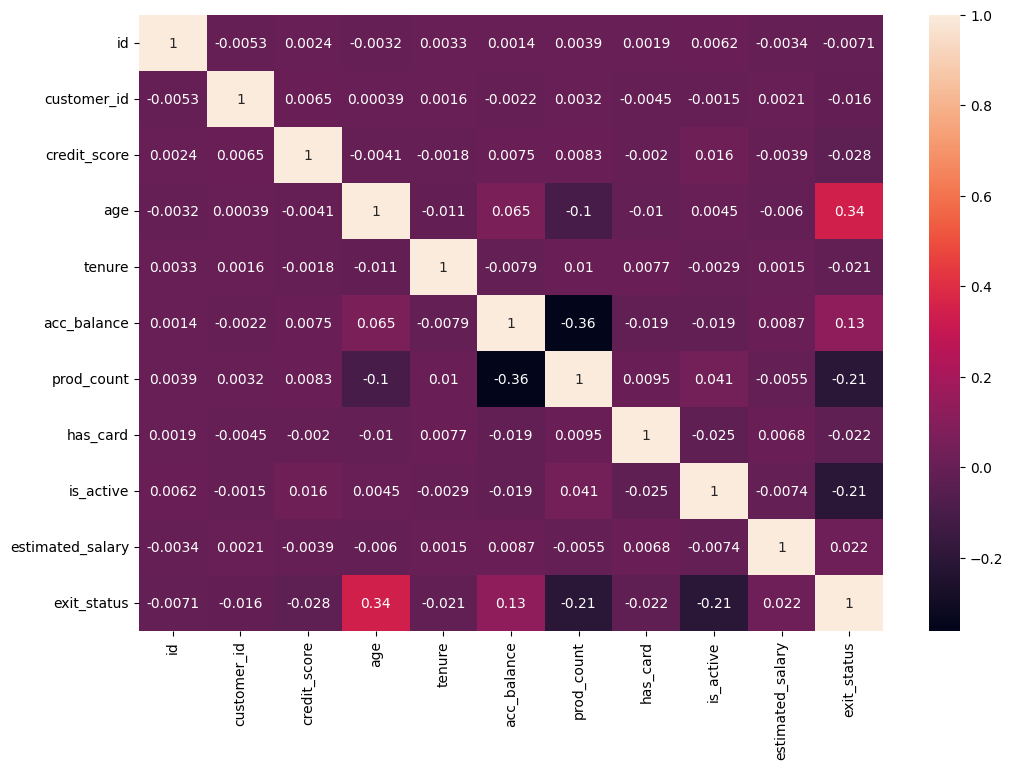

In [10]:
num_cols=train.select_dtypes(exclude="object").columns
plt.figure(figsize=(12,8))
sns.heatmap(train[num_cols].corr(),annot=True)
plt.show()

#### Missing Value Imputation Strategy
To preserve predictive signal while handling missing data, we applied a combination of:

Grouped Imputation based on relevant segments:

##### credit_score: Imputed using median by (country, age_bin)

##### acc_balance: Median within prod_count groups

##### prod_count: Median by is_active flag

##### country: Imputed using global mode

##### Missingness Indicator Features:
Added binary flags (missing_*) for each column with missing values, allowing the model to learn patterns associated with missingness, which can carry predictive power in real-world behavioral data.

Feature Binning:
Created an age_bin column to discretize age into ordinal buckets to assist group-wise imputation of credit_score.

In [11]:
train['age_bin'] = pd.cut(train['age'], bins=[17, 30, 40, 50, 60, 100], labels=False, include_lowest=True)

In [12]:
#train['age'].unique()
#test['age'].unique()

In [13]:
# 2. Create missing indicators for train dataset
train['missing_credit_score'] = train['credit_score'].isna().astype(int)
train['missing_acc_balance'] = train['acc_balance'].isna().astype(int)
train['missing_prod_count'] = train['prod_count'].isna().astype(int)
train['missing_country'] = train['country'].isna().astype(int)

In [14]:
# 3. Impute credit_score using group median (by country & age_bin)
train['credit_score'] = train.groupby(['country', 'age_bin'])['credit_score'].transform(lambda x: x.fillna(x.median()))

# 4. Impute acc_balance using group median (by prod_count)
train['acc_balance'] = train.groupby(['prod_count'])['acc_balance'].transform(lambda x: x.fillna(x.median()))

# 5. Impute prod_count using group median (by is_active)
train['prod_count'] = train.groupby(['is_active'])['prod_count'].transform(lambda x: x.fillna(x.median()))

                           
# 6. Impute country using mode
train['country'] = train['country'].fillna(train['country'].mode()[0])

After group-wise median imputation (based on country, age_bin, or prod_count), some values may still remain missing due to group sparsity or lack of sufficient non-null observations.
As a fallback, we impute these remaining missing values with the overall feature median to ensure no nulls persist in the final training dataset.

In [15]:
train.isnull().sum()

id                         0
customer_id                0
last_name                  0
credit_score            6021
country                    0
gender                     0
age                        0
tenure                     0
acc_balance             4863
prod_count                 0
has_card                   0
is_active                  0
estimated_salary           0
exit_status                0
age_bin                    0
missing_credit_score       0
missing_acc_balance        0
missing_prod_count         0
missing_country            0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer
median_imputer=SimpleImputer(strategy='median')
train['credit_score']=pd.DataFrame(median_imputer.fit_transform(train[['credit_score']]),index=train.index,columns=['credit_score'])
train['acc_balance']=pd.DataFrame(median_imputer.fit_transform(train[['acc_balance']]),index=train.index,columns=['acc_balance'])

In [17]:
train.isnull().sum()

id                      0
customer_id             0
last_name               0
credit_score            0
country                 0
gender                  0
age                     0
tenure                  0
acc_balance             0
prod_count              0
has_card                0
is_active               0
estimated_salary        0
exit_status             0
age_bin                 0
missing_credit_score    0
missing_acc_balance     0
missing_prod_count      0
missing_country         0
dtype: int64

## Testing Dataset

In [18]:
# 1. Use same age bins as training
test['age_bin'] = pd.cut(test['age'], bins=[17, 30, 40, 50, 60, 100], labels=False, include_lowest=True)

In [19]:
# 2. Create missing indicators for test dataset
test['missing_credit_score'] = test['credit_score'].isna().astype(int)
test['missing_acc_balance'] = test['acc_balance'].isna().astype(int)
test['missing_prod_count'] = test['prod_count'].isna().astype(int)
test['missing_country'] = test['country'].isna().astype(int)

In [20]:
# For test dataset imputation
def impute_credit_score(row):
    if pd.notnull(row['credit_score']):
        return row['credit_score']
    try:
        return group_medians_credit.loc[(row['country'], row['age_bin'])]
    except KeyError:
        return train['credit_score'].median()  # fallback

def impute_acc_balance(row):
    if pd.notnull(row['acc_balance']):
        return row['acc_balance']
    try:
        return group_medians_acc.loc[row['prod_count']]
    except KeyError:
        return train['acc_balance'].median()

def impute_prod_count(row):
    if pd.notnull(row['prod_count']):
        return row['prod_count']
    try:
        return group_medians_prod.loc[row['is_active']]
    except KeyError:
        return train['prod_count'].median()

In [21]:
# 2. Impute credit_score using (country, age_bin) median from train
group_medians_credit = train.groupby(['country', 'age_bin'])['credit_score'].median()


test['credit_score'] = test.apply(impute_credit_score, axis=1)

# 3. Impute acc_balance using prod_count median from train
group_medians_acc = train.groupby(['prod_count'])['acc_balance'].median()


test['acc_balance'] = test.apply(impute_acc_balance, axis=1)

# 4. Impute prod_count using is_active median from train
group_medians_prod = train.groupby(['is_active'])['prod_count'].median()



test['prod_count'] = test.apply(impute_prod_count, axis=1)

# 5. Impute country using mode from train
test['country'] = test['country'].fillna(train['country'].mode()[0])


In [22]:
test.isnull().sum()

id                      0
customer_id             0
last_name               0
credit_score            0
country                 0
gender                  0
age                     0
tenure                  0
acc_balance             0
prod_count              0
has_card                0
is_active               0
estimated_salary        0
age_bin                 0
missing_credit_score    0
missing_acc_balance     0
missing_prod_count      0
missing_country         0
dtype: int64

# Identifying and Handling Duplicates

## Training Dataset

In [23]:
duplicates=train[train.duplicated()]
num_of_duplicates=duplicates.shape[0]

print(f"The number of duplicate rows: {num_of_duplicates}" )

The number of duplicate rows: 0


In [24]:
train=train.drop_duplicates()
print(f"The number of duplicates after removal: {train.duplicated().sum()}")

The number of duplicates after removal: 0


## Testing Dataset

In [25]:
duplicates=test[test.duplicated()]
num_of_duplicates=duplicates.shape[0]

print(f"The number of duplicate rows: {num_of_duplicates}" )

The number of duplicate rows: 0


In [26]:
test=test.drop_duplicates()

# Identifying and Handling Outliers

## Training Dataset

In [27]:
#sns.boxplot(x=train['column_name'])--> for visualizing
# Exclude binary/categorical columns from outlier detection
excluded_cols = ['exit_status', 'has_card'] + [col for col in train.columns if col.startswith('missing') or col == 'age_bin']
numeric_cols = [col for col in train.select_dtypes(include=['int64', 'float64']).columns if col not in excluded_cols]
outlier_counts={}
def outliers(train,cols):
    for col in cols:
        Q1 = train[col].quantile(0.25)
        Q3 = train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = train[(train[col] < lower) | (train[col] > upper)]
        if outliers.shape[0]>0:
            outlier_counts[col] = outliers.shape[0]
    return outlier_counts
result=outliers(train,numeric_cols)
print(f"The total number of outliers in columns:{result}")

The total number of outliers in columns:{'credit_score': 2826, 'age': 3411, 'prod_count': 263}


In [28]:
caps=dict() #to store the capping values that can be used in test dataset
def cap_outliers(train, col):
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    caps[col]=(lower,upper)
    train[col] = train[col].clip(lower=lower, upper=upper)
    
for col in ['credit_score', 'age', 'prod_count']:
    cap_outliers(train, col)


## Testing Dataset

In [29]:
#Handling the outliers in the testing dataset according to training dataset
for col, (lower_cap, upper_cap) in caps.items():
    test[col] = test[col].clip(lower=lower_cap, upper=upper_cap)


# Visualization and Key Insights

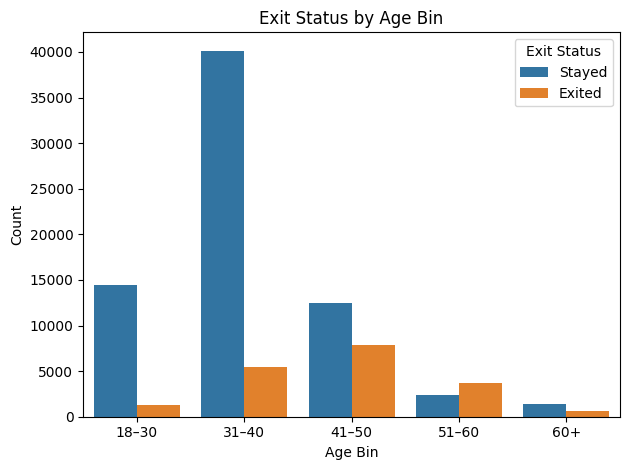

In [30]:
sns.countplot(x='age_bin', hue='exit_status', data=train)
plt.title('Exit Status by Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Count')

# Replace numeric bin labels with readable age ranges
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['18–30', '31–40', '41–50', '51–60', '60+'])

plt.legend(title='Exit Status', labels=['Stayed', 'Exited'])
plt.tight_layout()
plt.show()

### Insight:

Customers aged 31–40 form the largest segment and are the least likely to exit.

Exit rates increase notably in the 41–50 and 51–60 age bins.

Customers aged 60+ show relatively low exit and engagement, possibly due to a smaller sample.

### Takeaway: Age is a strong predictor — especially customers above 40 are more likely to churn.

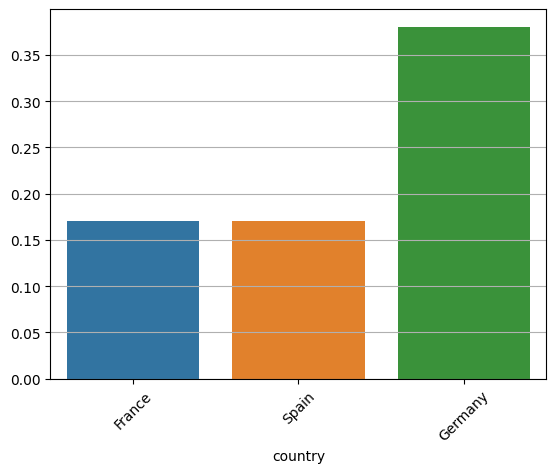

In [31]:
exit_rate_by_country = train.groupby('country')['exit_status'].mean().sort_values()
sns.barplot(x=exit_rate_by_country.index, y=exit_rate_by_country.values)
plt.xticks(rotation=45)
plt.grid(axis='y')

### Insight:

Germany has the highest exit rate, clearly standing out from other countries.

France and Spain have similar and relatively low churn rates.

### Takeaway: Country of residence impacts churn, with Germany showing signs of higher dissatisfaction or disengagement.

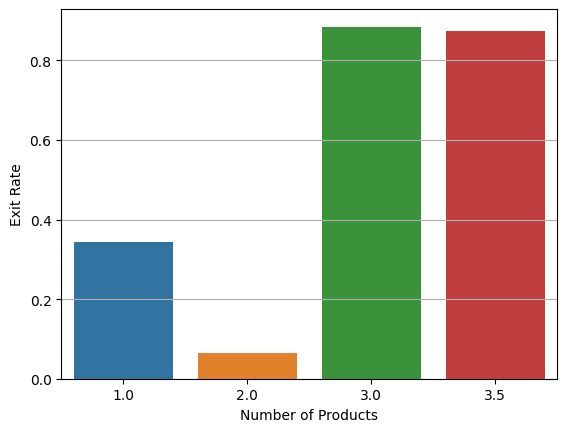

In [32]:
exit_rate_by_product = train.groupby('prod_count')['exit_status'].mean()
sns.barplot(x=exit_rate_by_product.index, y=exit_rate_by_product.values)
plt.xlabel("Number of Products")
plt.ylabel("Exit Rate")
plt.grid(axis='y')

### Insight:

Customers with 2 products have the lowest churn rate, indicating higher satisfaction or engagement.

Those with 3 or more products show an extremely high churn rate, possibly due to:

Overburdened account handling

Ineffective cross-selling or up-selling

Even 1-product customers show a moderate churn rate.

### Takeaway: Optimal engagement seems to be around 2 products; more isn’t always better — flag high product count customers for retention strategies.

<Axes: xlabel='exit_status', ylabel='count'>

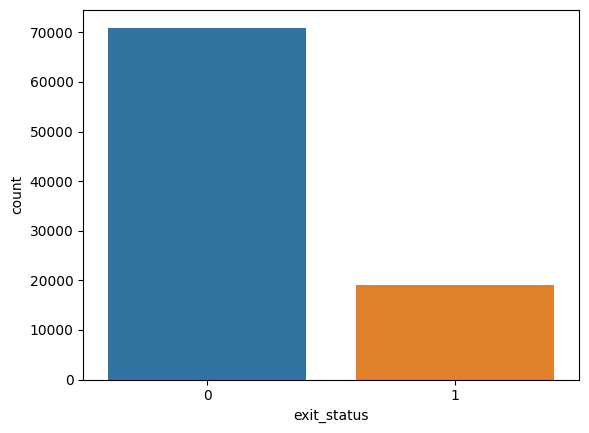

In [33]:
sns.countplot(x='exit_status', data=train)


### 4. Class Imbalance (Exit Status)
### Insight:

There’s a clear class imbalance:

~20% customers exited (1)

~80% customers stayed (0)

This imbalance needs to be addressed using methods like:

Resampling (SMOTE/undersampling)

Stratified K-Fold Cross-validation

F1-score/ROC-AUC over accuracy

### Takeaway: Imbalanced classification problem — evaluation and training strategies must account for it to avoid misleading performance metrics.

# Scaling and Encoding

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

🎯 stratify=y ensures class balance is maintained when splitting the dataset.
Why it's important:
In classification problems — if your classes are imbalanced (e.g., 80% stayed, 20% exited), a regular train_test_split() might randomly create a test set with mostly one class.



In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    30000 non-null  int64  
 1   customer_id           30000 non-null  int64  
 2   last_name             30000 non-null  object 
 3   credit_score          30000 non-null  float64
 4   country               30000 non-null  object 
 5   gender                30000 non-null  object 
 6   age                   30000 non-null  float64
 7   tenure                30000 non-null  int64  
 8   acc_balance           30000 non-null  float64
 9   prod_count            30000 non-null  float64
 10  has_card              30000 non-null  float64
 11  is_active             30000 non-null  float64
 12  estimated_salary      30000 non-null  float64
 13  age_bin               30000 non-null  int64  
 14  missing_credit_score  30000 non-null  int64  
 15  missing_acc_balance

## Train-Test split

In [36]:
X = train.drop("exit_status", axis=1)
y = train["exit_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [37]:
# id and customer_id are unique for every row, hence better to drop
X_train=X_train.drop(['id','customer_id'],axis=1)
X_test=X_test.drop(['id','customer_id'],axis=1)
test=test.drop(['id','customer_id'],axis=1)

## Encoding Categorical & Scaling Numerical Features

In [38]:
cat_cols=X_train.select_dtypes(include="object").columns
cat_cols

Index(['last_name', 'country', 'gender'], dtype='object')

In [39]:
X_train['last_name'].unique() #Many Values, better to drop
X_train['gender'].unique() # Only 2 values, better to use OneHotEncoder
X_train['country'].unique() #Only 3 values, better to use OneHotEncoder

array(['France', 'Germany', 'Spain'], dtype=object)

In [40]:
X_train=X_train.drop(['last_name'],axis=1)
X_test=X_test.drop(['last_name'],axis=1)
test=test.drop(['last_name'],axis=1)

In [41]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [42]:
num_cols=X_train.select_dtypes(exclude="object").columns
num_cols
# num_cols=X_train.select_dtypes(exclude="object").columns
# num_cols

Index(['credit_score', 'age', 'tenure', 'acc_balance', 'prod_count',
       'has_card', 'is_active', 'estimated_salary', 'age_bin',
       'missing_credit_score', 'missing_acc_balance', 'missing_prod_count',
       'missing_country'],
      dtype='object')

In [43]:
ct=ColumnTransformer([
    ('tr1',OneHotEncoder(drop="first",sparse_output=False,handle_unknown='ignore'),['country','gender']),
    ('tr2',StandardScaler(),num_cols)
],remainder="passthrough",verbose_feature_names_out=False).set_output(transform="pandas")
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)
test=ct.transform(test)

# Model Building

## Logistic Regression

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
prediction=log_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction))

Accuracy: 0.8334
Precision: 0.6930
Recall: 0.3823
F1 Score: 0.4927

Confusion Matrix:
[[13546   645]
 [ 2353  1456]]


## K Nearest Neighbors Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
prediction = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction))

Accuracy: 0.8412
Precision: 0.6612
Recall: 0.5114
F1 Score: 0.5768

Confusion Matrix:
[[13193   998]
 [ 1861  1948]]


## Ada Boost Classifier

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
adb_model=AdaBoostClassifier()
adb_model.fit(X_train,y_train)
prediction = adb_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction))

Accuracy: 0.8556
Precision: 0.7316
Recall: 0.5017
F1 Score: 0.5952

Confusion Matrix:
[[13490   701]
 [ 1898  1911]]


## DecisionTree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
prediction = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction))

Accuracy: 0.7872
Precision: 0.4972
Recall: 0.5196
F1 Score: 0.5082

Confusion Matrix:
[[12190  2001]
 [ 1830  1979]]


## Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
prediction = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction))

Accuracy: 0.8521
Precision: 0.7087
Recall: 0.5109
F1 Score: 0.5937

Confusion Matrix:
[[13391   800]
 [ 1863  1946]]


## Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train,y_train)
prediction = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction))

Accuracy: 0.8591
Precision: 0.7456
Recall: 0.5070
F1 Score: 0.6035

Confusion Matrix:
[[13532   659]
 [ 1878  1931]]


## XGBoost Classifier

In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
from xgboost import XGBClassifier

In [59]:
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
prediction = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction))

Accuracy: 0.8553
Precision: 0.7138
Recall: 0.5277
F1 Score: 0.6068

Confusion Matrix:
[[13385   806]
 [ 1799  2010]]


## HistGradient Boosting Classifier

In [60]:
from sklearn.ensemble import HistGradientBoostingClassifier

hist_model = HistGradientBoostingClassifier(random_state=42)
hist_model.fit(X_train, y_train)
y_pred_hgb = hist_model.predict(X_test)

print("HGB F1 Score:", f1_score(y_test, y_pred_hgb))
print("Precision:", precision_score(y_test, y_pred_hgb))
print("Recall:", recall_score(y_test, y_pred_hgb))
print("Accuracy:", accuracy_score(y_test, y_pred_hgb))


HGB F1 Score: 0.6138433515482695
Precision: 0.7275998560633321
Recall: 0.5308479915988449
Accuracy: 0.8586666666666667


### LightBGM

In [61]:
!pip install lightgbm --quiet


In [62]:
# Import required libraries
import lightgbm as lgb

# Create the model
lgbm = lgb.LGBMClassifier(random_state=42)

# Train on train set
lgbm.fit(X_train, y_train)

# Predict on test set
y_pred_lgb = lgbm.predict(X_test)

# Evaluate performance
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1 Score:", f1_score(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 15235, number of negative: 56765
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 72000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211597 -> initscore=-1.315325
[LightGBM] [Info] Start training from score -1.315325
LightGBM Accuracy: 0.8587222222222223
Precision: 0.7298474945533769
Recall: 0.527697558414282
F1 Score: 0.6125247600182844


# Hyperparameter Tuning

In [63]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Gradient Boost Classifier

In [64]:
params_gb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
gb_model=GradientBoostingClassifier(random_state=42)

In [65]:
search_gb = RandomizedSearchCV(estimator=gb_model, param_distributions=params_gb,scoring='f1', n_iter=10, cv=5, n_jobs=-1, random_state=42)
search_gb.fit(X_train,y_train)


print("Best Params:", search_gb.best_params_)
print("Best F1 Score (CV):", search_gb.best_score_)
y_pred = search_gb.best_estimator_.predict(X_test)
print("Test F1 Score:", f1_score(y_test, y_pred))

Best Params: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Best F1 Score (CV): 0.6247952242009326
Test F1 Score: 0.6124255838803238


## XG Boost Classifier

In [66]:
params_xgb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_model=XGBClassifier(random_state=42)

In [67]:
search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=params_xgb, scoring='f1', n_iter=20, cv=5, n_jobs=-1, random_state=42)
search_xgb.fit(X_train,y_train)


print("Best Params:", search_xgb.best_params_)
print("Best F1 Score (CV):", search_xgb.best_score_)
y_pred = search_xgb.best_estimator_.predict(X_test)
print("Test F1 Score:", f1_score(y_test, y_pred))

Best Params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best F1 Score (CV): 0.6244657790635648
Test F1 Score: 0.6104972375690607


## HistGradientBoostingClassifier

In [68]:
from sklearn.model_selection import GridSearchCV

hgb = HistGradientBoostingClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_iter': [100, 200],
    'max_depth': [None, 7, 10],
    'l2_regularization': [0.0, 1.0, 5.0],
}

grid = GridSearchCV(
    hgb,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
print("Best F1 score:", grid.best_score_)
print("Best parameters:", grid.best_params_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best F1 score: 0.6304208444824942
Best parameters: {'l2_regularization': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'max_iter': 100}


In [69]:
best_hgb = grid.best_estimator_

# Predict on test data
y_pred = best_hgb.predict(X_test)

# Print test set scores
print("Test F1 Score:", f1_score(y_test, y_pred))
print("Test Precision:", precision_score(y_test, y_pred))
print("Test Recall:", recall_score(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test F1 Score: 0.6107494322482968
Test Precision: 0.7213876967095851
Test Recall: 0.529535311105277
Test Accuracy: 0.8571666666666666


# Comparison of Model Performance

In [70]:
models = {
    'Gradient Boost': search_gb.best_estimator_,
    'XGBoost': search_xgb.best_estimator_, 
    'Ada Boost': adb_model,
    'K Nearest Neighbors' : knn_model,
    'HistGradient Boosting' : hist_model, #without tuning gave better results
    'Light BGM': lgbm #without tuning gave better results
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, f1, precision, recall, accuracy))

results_df = pd.DataFrame(results, columns=['Model', 'F1 Score', 'Precision', 'Recall','Accuracy'])
results_df.sort_values(by='F1 Score', ascending=False, inplace=True)

print(results_df)

                   Model  F1 Score  Precision    Recall  Accuracy
4  HistGradient Boosting  0.613843   0.727600  0.530848  0.858667
5              Light BGM  0.612525   0.729847  0.527698  0.858722
0         Gradient Boost  0.612426   0.731583  0.526647  0.858944
1                XGBoost  0.610497   0.734762  0.522184  0.859000
2              Ada Boost  0.595234   0.731623  0.501706  0.855611
3    K Nearest Neighbors  0.576758   0.661236  0.511420  0.841167


Confusion Matrix for Gradient Boost


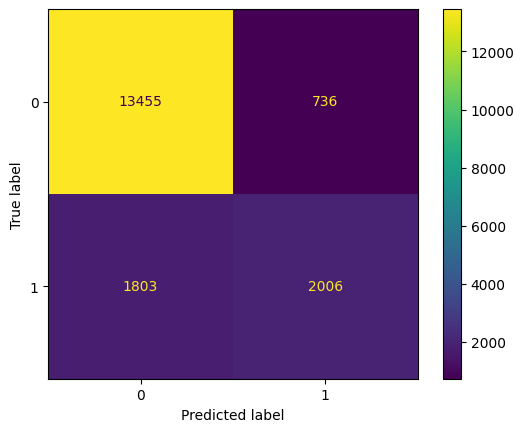

Confusion Matrix for XGBoost


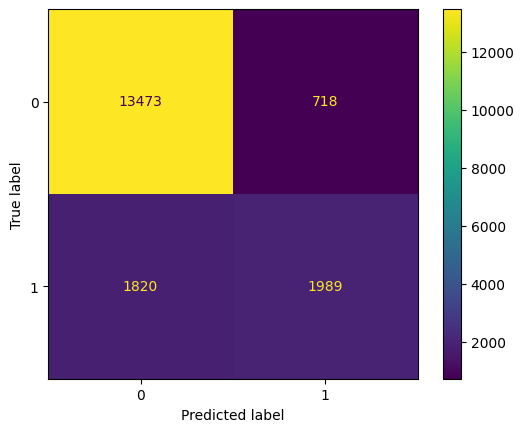

Confusion Matrix for Ada Boost


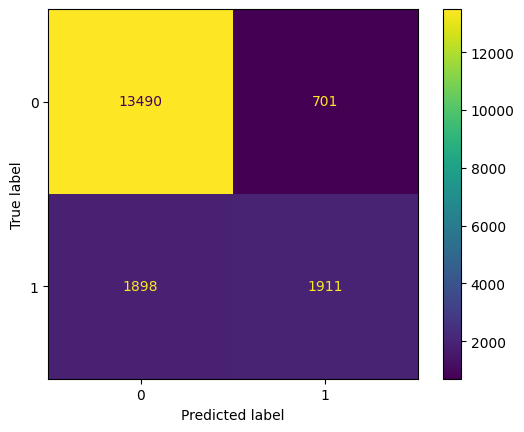

Confusion Matrix for K Nearest Neighbors


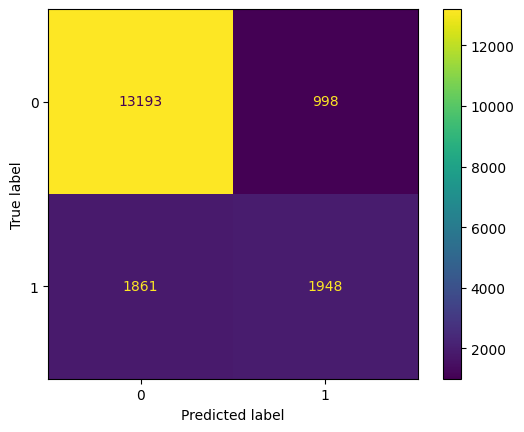

Confusion Matrix for HistGradient Boosting


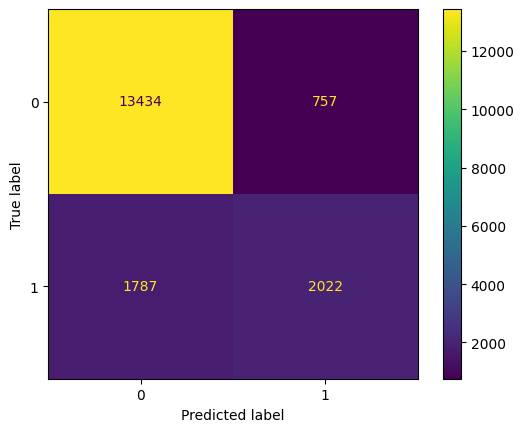

Confusion Matrix for Light BGM


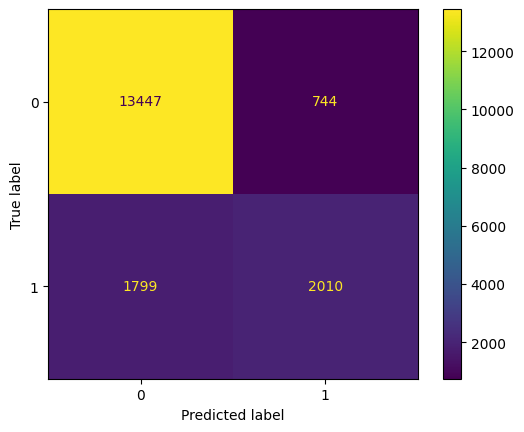

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Confusion Matrix for {name}")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

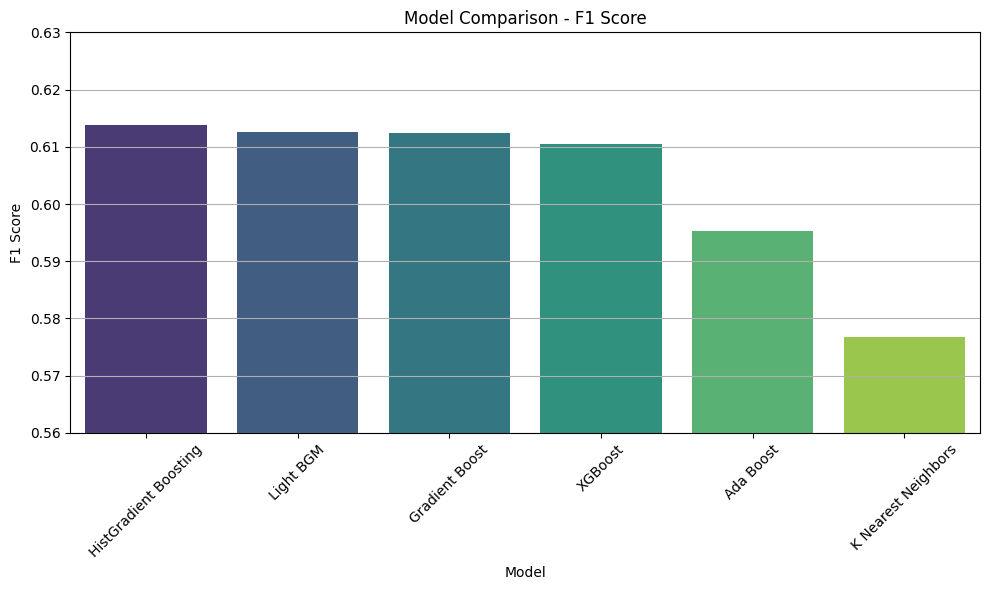

In [72]:
# Example: Zoom into the F1 range
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='F1 Score', palette='viridis')
plt.title('Model Comparison - F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Model')

# Set tighter y-axis limits based on your actual scores
plt.ylim(0.56, 0.63)  # Adjust these values based on your actual score range

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# Final Submission

### Using Voting Classifier

In [73]:
# from sklearn.ensemble import VotingClassifier

# # VotingClassifier with LightGBM included
# voting_clf = VotingClassifier(
#     estimators=[
#         ('hgb', best_hgb),
#         # ('gb', search_gb.best_estimator_),
#         ('xgb', search_xgb.best_estimator_),
#         ('lgb', lgbm)
#     ],
#     voting='soft',  # Use soft voting for probability-based ensemble
#     n_jobs=-1
# )

# # Fit the ensemble model
# voting_clf.fit(X_train, y_train)

# # Predict on validation/test set
# y_pred = voting_clf.predict(X_test)

# # Evaluate
# print("Voting Classifier F1 Score:", f1_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("Accuracy:", accuracy_score(y_test, y_pred))


### Stacking different models

In [74]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression

# # Define base learners
# base_learners = [
#     ('hgb', best_hgb),
#     ('gb', search_gb.best_estimator_),
#     ('lgb', lgb.LGBMClassifier(random_state=42))
# ]

# # Define meta learner
# meta_learner = LogisticRegression(max_iter=1000)

# # Stacking classifier
# stack_clf = StackingClassifier(
#     estimators=base_learners,
#     final_estimator=meta_learner,
#     passthrough=True,  # allows meta-learner to use original features too
#     n_jobs=-1
# )

# # Train
# stack_clf.fit(X_train, y_train)

# # Predict
# y_pred_stack = stack_clf.predict(X_test)

# # Evaluate
# print("Stacking F1 Score:", f1_score(y_test, y_pred_stack))
# print("Precision:", precision_score(y_test, y_pred_stack))
# print("Recall:", recall_score(y_test, y_pred_stack))
# print("Accuracy:", accuracy_score(y_test, y_pred_stack))


### Blending 

In [75]:
# Predict class probabilities
proba_hgb = hist_model.predict_proba(X_test)
proba_gb = search_gb.best_estimator_.predict_proba(X_test)
proba_lgb = lgbm.predict_proba(X_test)
proba_xgb=search_xgb.best_estimator_.predict_proba(X_test)

# Weighted average of probabilities (you can adjust the weights)
# avg_proba = (0.4 * proba_hgb + 0.3 * proba_gb + 0.3 * proba_xgb)
avg_proba = (
    0.55 * proba_hgb +
    0.45 * proba_lgb
)
#giving the best result till now


# Get final predicted class from the highest probability
y_pred_blend = (avg_proba[:, 1] >= 0.5).astype(int)

# Evaluate
print("Blended F1 Score:", f1_score(y_test, y_pred_blend))
print("Precision:", precision_score(y_test, y_pred_blend))
print("Recall:", recall_score(y_test, y_pred_blend))
print("Accuracy:", accuracy_score(y_test, y_pred_blend))


Blended F1 Score: 0.6149870801033592
Precision: 0.7303249097472925
Recall: 0.5311105276975584
Accuracy: 0.8592777777777778


In [76]:
# Predict probabilities on actual test data (submission set)
proba_hgb_test = hist_model.predict_proba(test)
proba_lgb_test = lgbm.predict_proba(test)

# Weighted average of probabilities
final_avg_proba = (
    0.55 * proba_hgb_test +
    0.45 * proba_lgb_test
)

# Convert probabilities to class labels (threshold 0.5)
final_predictions = (final_avg_proba[:, 1] >= 0.5).astype(int)


submission_df = pd.DataFrame({
    'id': raw_test['id'], 
    'exit_status': final_predictions
})

# Export to CSV
submission_df.to_csv("submission.csv", index=False)

print("✅ submission.csv generated successfully.")


✅ submission.csv generated successfully.


In [77]:
# # Predict on the final test set using your voting classifier
# y_final_pred = stack_clf.predict(test)

# # Create submission DataFrame using the original 'id' column
# submission = pd.DataFrame({
#     'id': raw_test['id'],
#     'target': y_final_pred
# })

# # Save to CSV
# submission.to_csv('submission.csv', index=False)


In [78]:
# import os

# # Replace with the exact filename you want to delete
# file_to_delete = 'submission.csv'

# # Delete if it exists
# if os.path.exists(file_to_delete):
#     os.remove(file_to_delete)
#     print(f"Deleted '{file_to_delete}'")
# else:
#     print(f"File '{file_to_delete}' not found")